In [1]:
#importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

In [2]:
#importing output result for test dataset, building structure dataset file and building dataset file respectively as seperate dataframes
final_result=pd.read_csv("output.csv")
building_structure_data = pd.read_csv("Building_Structure.csv")
building_ownership_data = pd.read_csv("Building_Ownership_Use.csv")

In [3]:
#checking (num of rows, num of cols) for every dataframe 
print(building_ownership_data.shape)
print(building_structure_data.shape)
print(final_result.shape)

(1052948, 17)
(1052948, 29)
(421175, 2)


In [4]:
print(building_ownership_data.columns)

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype='object')


In [5]:
print(building_structure_data.columns)

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq'],
      dtype='object')


In [6]:
print(final_result.columns)

Index(['building_id', 'damage_grade'], dtype='object')


In [7]:
#merging dataframes
#merging the bulding structure dataframe and building ownership dataframe into one
building = pd.merge(building_structure_data, building_ownership_data, on='building_id')
print(building.shape)

#merging the above dataframe with the obtained predicted output data
final_result = pd.merge(final_result, building, on='building_id')
print(final_result.shape)

(1052948, 45)
(421175, 46)


In [8]:
categories = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
final_result.damage_grade = final_result.damage_grade.map(categories)

Lets visualize the damage grade for the whole data based on district_id

Text(0,0.5,'Damage Grade')

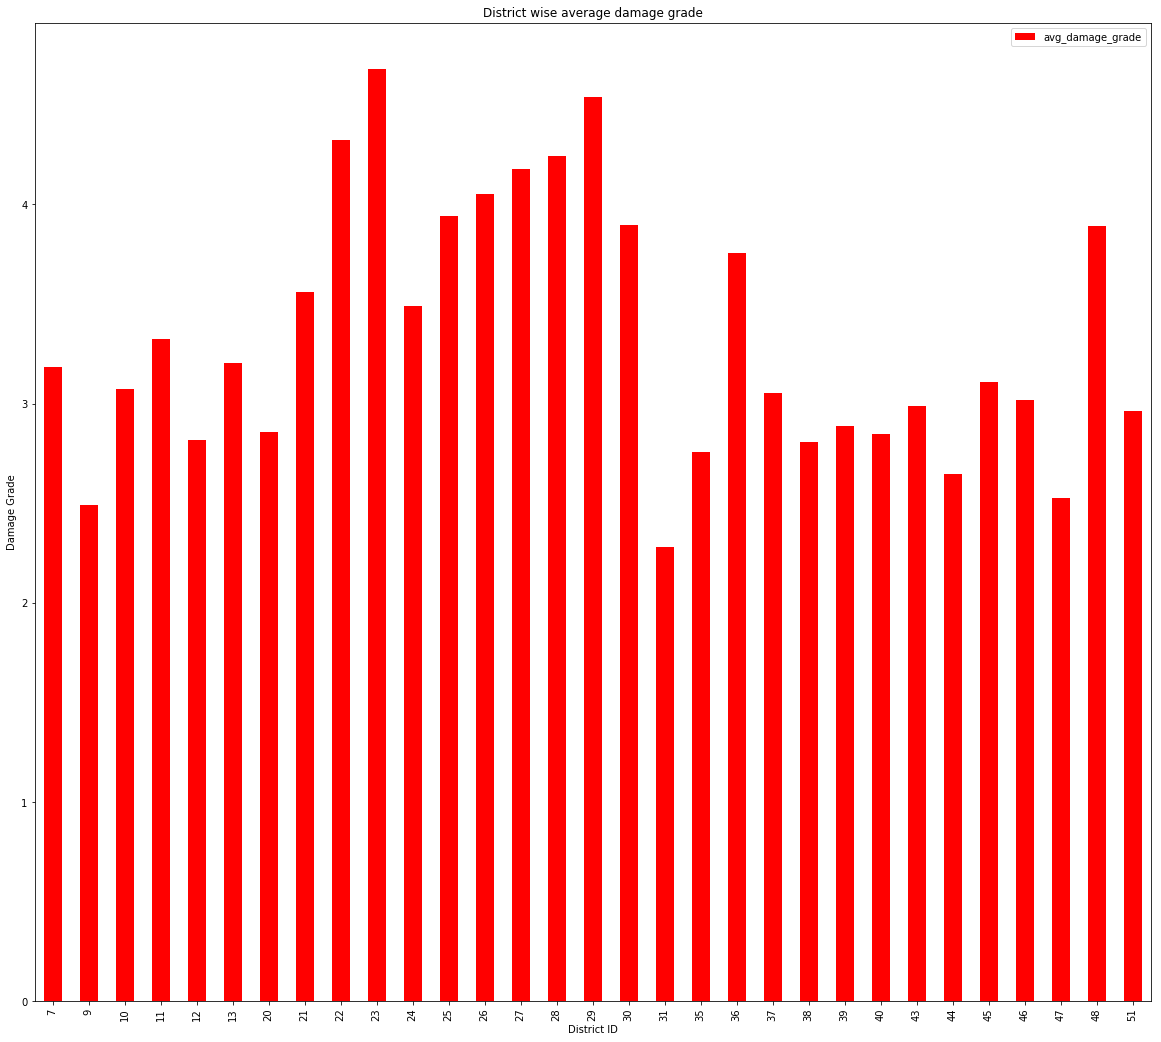

In [14]:
#calculating average damage grade per district
dist_ids = sorted(final_result.district_id_x.unique())
avg_dmg_grd = [0] * len(dist_ids)
avg_dmg_count = [0] * len(dist_ids)
j=0
for i in final_result.district_id_x:
    ind = dist_ids.index(i)
    avg_dmg_count[ind]+=1
    avg_dmg_grd[ind]+=final_result.damage_grade[j]
    j+=1
for i in range(0, len(dist_ids)):
    avg_dmg_grd[i]=avg_dmg_grd[i]/avg_dmg_count[i]
avg_dmg = pd.DataFrame(data={'district_id': dist_ids, 'avg_damage_grade': avg_dmg_grd})
avg_dmg = avg_dmg.sort_values(by=['district_id']).reset_index(drop=True)

#plotting the graph for the same
a = avg_dmg.plot(x='district_id', y='avg_damage_grade', kind='bar', color = ['red'])
a.set_title('District wise average damage grade')
a.set_xlabel('District ID')
a.set_ylabel('Damage Grade')

Lets visualize it for a particular district

Text(0,0.5,'Damage Grade')

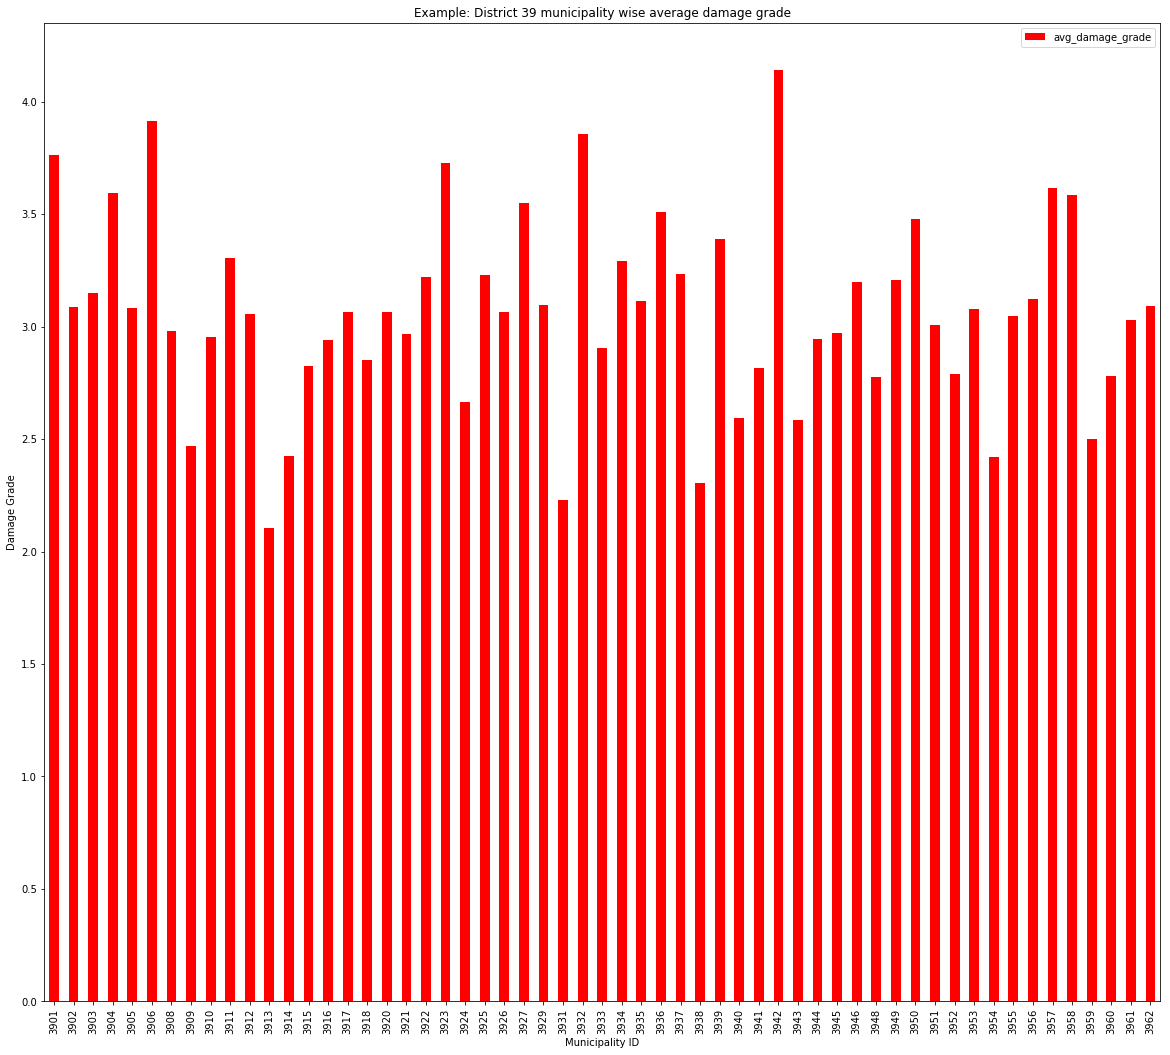

In [15]:
# district wise array of frames.
District=[0]*52
grp=final_result.groupby('district_id_x')
counter=0
for name,group in grp:
    District[int(name)]=group
    counter+=1
    if counter==len(dist_ids):
        break
#sample output: District[11]

#average damage grade for each municipality in a district
md = District[39].reset_index(drop=True)
md39 = sorted(md.vdcmun_id_x.unique())
md39sum = [0] * len(md39)
md39count = [0] * len(md39)
j=0
for i in md.vdcmun_id_x:
    ind = md39.index(i)
    md39count[ind]+=1
    md39sum[ind]+=md.damage_grade[j]
    j+=1
for i in range(0, len(md39)):
     md39sum[i]=md39sum[i]/md39count[i]
mdplot = pd.DataFrame(data={'mun_id': md39, 'avg_damage_grade': md39sum})

#plotting the graph
c = mdplot.plot(x='mun_id', y='avg_damage_grade', kind='bar', color = ['red'])
c.set_title('Example: District 39 municipality wise average damage grade')
c.set_xlabel('Municipality ID')
c.set_ylabel('Damage Grade')

Like that we can visualize the damage grade for any district

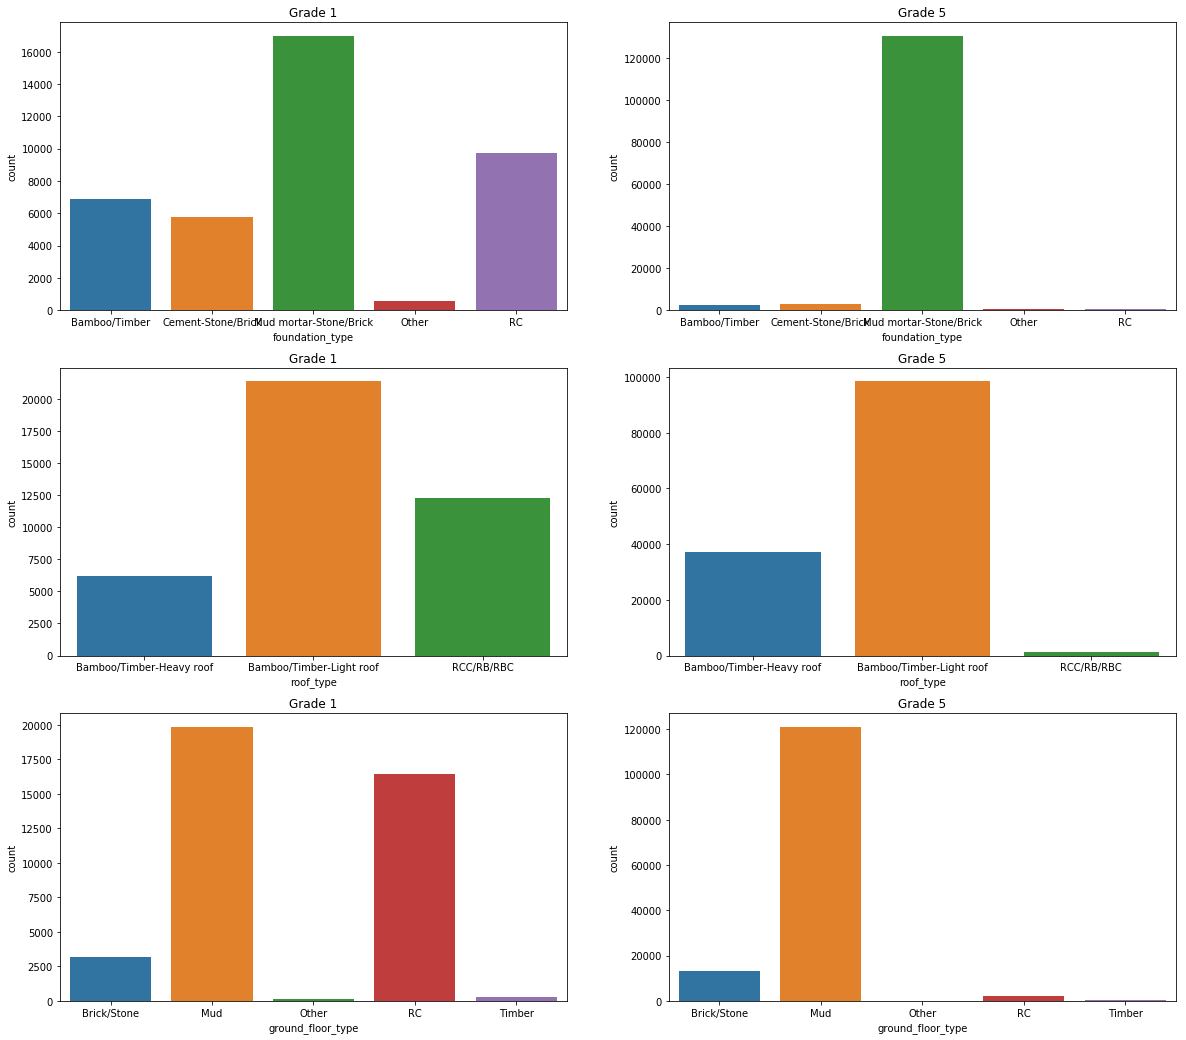

In [13]:
#grade wise distribution
Grade=[0]*6
grp1=final_result.groupby('damage_grade')
counter=0
for name,group in grp1:
    Grade[name]=group
    counter+=1
    if counter==5:
        break

#graphs for some features for grade 1 and grade 5 buildings
g1 = Grade[1].reset_index(drop=True)
g5 = Grade[5].reset_index(drop=True)

plt.rcParams['figure.figsize']=(20,18)
f, ax = plt.subplots(ncols=2, nrows=3)
ax[0][0].set_title('Grade 1')
g1 = g1.sort_values(by=['foundation_type']).reset_index(drop=True)
sns.countplot(x='foundation_type', data = g1, ax=ax[0][0])
ax[0][1].set_title('Grade 5')
g5 = g5.sort_values(by=['foundation_type']).reset_index(drop=True)
sns.countplot(x='foundation_type', data = g5, ax=ax[0][1])
ax[1][0].set_title('Grade 1')
g1 = g1.sort_values(by=['roof_type']).reset_index(drop=True)
sns.countplot(x='roof_type', data = g1, ax=ax[1][0])
ax[1][1].set_title('Grade 5')
g5 = g5.sort_values(by=['roof_type']).reset_index(drop=True)
sns.countplot(x='roof_type', data = g5, ax=ax[1][1])
ax[2][0].set_title('Grade 1')
g1 = g1.sort_values(by=['ground_floor_type']).reset_index(drop=True)
sns.countplot(x='ground_floor_type', data = g1, ax=ax[2][0])
ax[2][1].set_title('Grade 5')
g5 = g5.sort_values(by=['ground_floor_type']).reset_index(drop=True)
sns.countplot(x='ground_floor_type', data = g5, ax=ax[2][1])

we can infer that to minimize earthquake damage, Foundation type must be RC, Roof type must be RCC/RB/RBC, Ground floor type must be RC and like this other features can also be compared.